In [24]:
### Importing the important libraries to proceed 
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns 
%matplotlib inline 


pd.set_option('display.max_columns',100)
pd.set_option('display.max_rows',100)
plt.figure(figsize=(12,10))

import warnings
warnings.filterwarnings('ignore')

<Figure size 864x720 with 0 Axes>

In [25]:
data = pd.read_csv('train.csv')
test = pd.read_csv('test.csv')

In [26]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


Bob has started his own mobile company. He wants to give tough fight to big companies like Apple,Samsung etc.

He does not know how to estimate price of mobiles his company creates. In this competitive mobile phone market you cannot simply assume things. To solve this problem he collects sales data of mobile phones of various companies.

Bob wants to find out some relation between features of a mobile phone(eg:- RAM,Internal Memory etc) and its selling price. But he is not so good at Machine Learning. So he needs your help to solve this problem.

In this problem you do not have to predict actual price but a price range indicating how high the price is

In [27]:
data.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
three_g          0
touch_screen     0
wifi             0
price_range      0
dtype: int64

In [28]:
## Cool

In [29]:
data.describe().columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'three_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [30]:
data.shape

(2000, 21)

In [31]:
data.head(5)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [32]:
data['Ram_to_GB']= data['ram']/1024

In [33]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Ram_to_GB
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,2.489258
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,2.569336
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2.541992
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2.704102
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1.377930
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1,1.041992
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,3.144531
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0,0.683594
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,1.073242
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,0.500977


In [34]:
### Comparing the ram(GB) with the price range

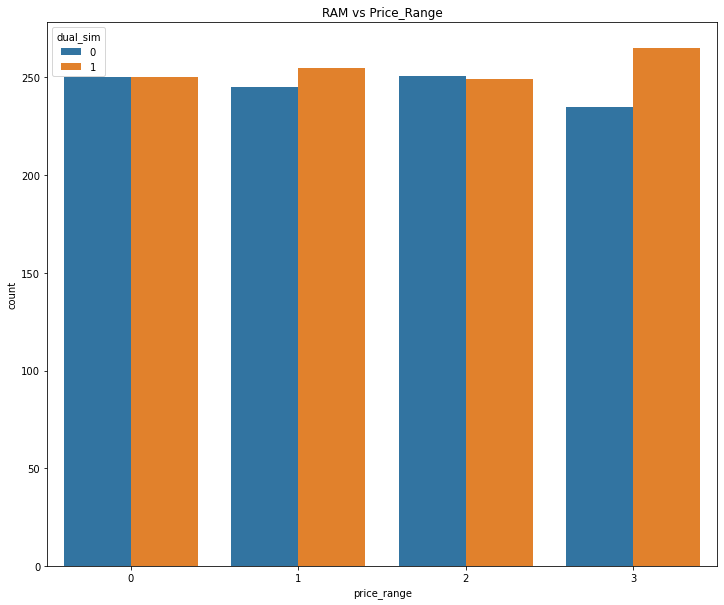

In [35]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='price_range',hue='dual_sim')
plt.title('RAM vs Price_Range')
plt.show()

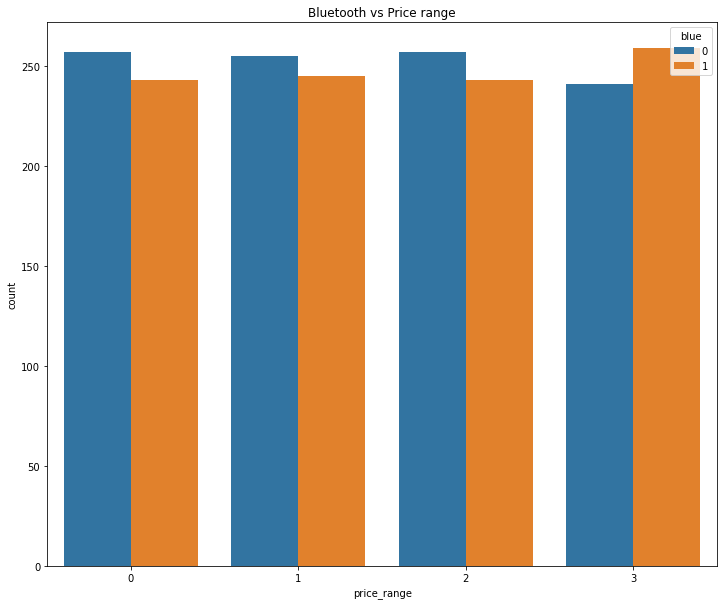

In [36]:
### bluetooth vs price range 
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='price_range',hue='blue')
plt.title('Bluetooth vs Price range')
plt.show()

In [37]:
data['battery_power'].nunique()

1094

In [38]:
data['battery_power'].min()

501

In [39]:
data['battery_power'].max()

1998

In [40]:
data['battery_power'].mean()

1238.5185

In [41]:
data['battery_power'].describe()

count    2000.000000
mean     1238.518500
std       439.418206
min       501.000000
25%       851.750000
50%      1226.000000
75%      1615.250000
max      1998.000000
Name: battery_power, dtype: float64

In [43]:
for i in data['battery_power']:
    if i == 501:
        print('Low')

Low
Low


In [44]:
bat_pow_thres = [] 

for i in data['battery_power']:
    if i <= 501:
        bat_pow_thres.append('Low')
    elif i <= 1238.5185:
        bat_pow_thres.append('Medium')
    else:
        bat_pow_thres.append('High')

In [45]:
bat_pow_thres


['Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'High',
 'High',
 'Medium',
 'Medium',
 'High',
 'Medium',
 'High',
 'High',
 'Medium',
 'M

In [46]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Ram_to_GB
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,2.489258
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,2.569336
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2.541992
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2.704102
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1.377930
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1,1.041992
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,3.144531
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0,0.683594
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,1.073242
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,0.500977


In [47]:
data['bat_pow_thres'] = bat_pow_thres

In [48]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Ram_to_GB,bat_pow_thres
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,2.489258,Medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,2.569336,Medium
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2.541992,Medium
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2.704102,Medium
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1.377930,High
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1,1.041992,High
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,3.144531,High
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0,0.683594,High
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,1.073242,High
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,0.500977,Medium


<AxesSubplot:title={'center':'Battery_power_categories'}>

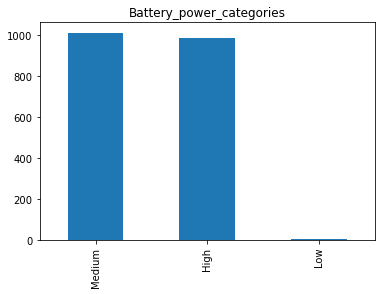

In [55]:
data['bat_pow_thres'].value_counts().plot.bar(title='Battery_power_categories')

In [51]:
data['bat_pow_thres'].value_counts()

Medium    1012
High       986
Low          2
Name: bat_pow_thres, dtype: int64

In [52]:
1012+986+2


2000

<AxesSubplot:>

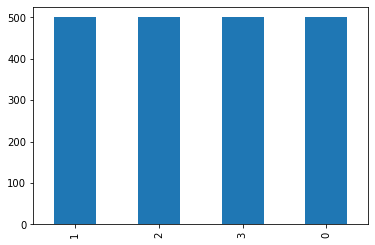

In [57]:
data['price_range'].value_counts().plot.bar()

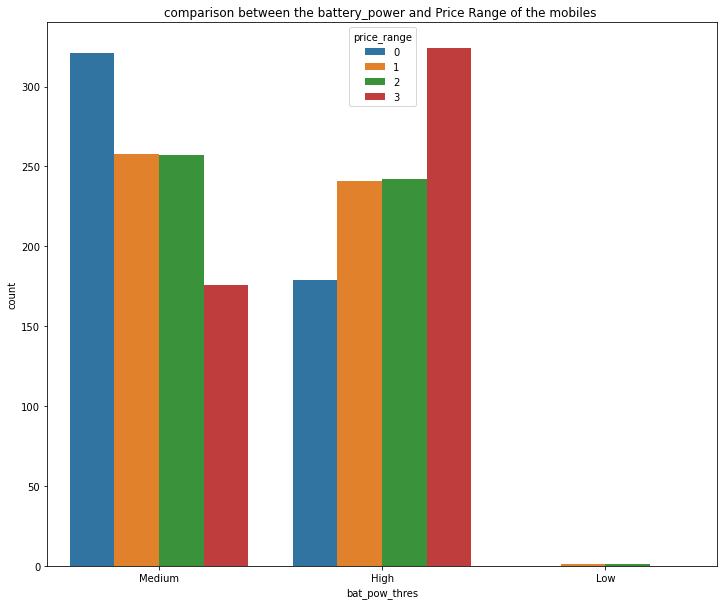

In [59]:
plt.figure(figsize=(12,10))
sns.countplot(data=data,x='bat_pow_thres',hue='price_range')
plt.title('comparison between the battery_power and Price Range of the mobiles ')
plt.show()

In [60]:
data.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range,Ram_to_GB,bat_pow_thres
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1,2.489258,Medium
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2,2.569336,Medium
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2,2.541992,Medium
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2,2.704102,Medium
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1,1.377930,High
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1,1.041992,High
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3,3.144531,High
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0,0.683594,High
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0,1.073242,High
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0,0.500977,Medium


In [67]:
df = data.drop(['Ram_to_GB'],axis=1)

In [68]:
df = df.drop(['bat_pow_thres'],axis=1)

In [69]:
df.head(10)

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
5,1859,0,0.5,1,3,0,22,0.7,164,1,7,1004,1654,1067,17,1,10,1,0,0,1
6,1821,0,1.7,0,4,1,10,0.8,139,8,10,381,1018,3220,13,8,18,1,0,1,3
7,1954,0,0.5,1,0,0,24,0.8,187,4,0,512,1149,700,16,3,5,1,1,1,0
8,1445,1,0.5,0,0,0,53,0.7,174,7,14,386,836,1099,17,1,20,1,0,0,0
9,509,1,0.6,1,2,1,9,0.1,93,5,15,1137,1224,513,19,10,12,1,0,0,0


In [70]:
X = df.drop(['price_range'],axis=1)
y = df['price_range']

In [71]:
X

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [72]:
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [73]:
df['price_range'].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

In [74]:
### Lets split the data into train test 

In [75]:
from sklearn.model_selection import train_test_split

In [76]:
### As we checked earlier there is no imbalance data in this data 

In [77]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.5,random_state=42)

In [78]:
### we have splitted the data lets scale the data

In [79]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()

In [80]:
## Lets scale the data

In [81]:
x_train = std.fit_transform(x_train)
x_test = std.transform(x_test)

In [82]:
#### Lets print our model's shape

(1000,)

In [84]:
print(x_train.shape)
print(' '*150)
print('*'*150)
print(x_test.shape)
print(' '*150)
print('*'*150)
print(y_train.shape)
print(' '*150)
print('*'*150)
print(y_test.shape)



(1000, 20)
                                                                                                                                                      
******************************************************************************************************************************************************
(1000, 20)
                                                                                                                                                      
******************************************************************************************************************************************************
(1000,)
                                                                                                                                                      
******************************************************************************************************************************************************
(1000,)


#### Modeling the data 


###  Logistic Regression 

In [86]:
from sklearn.linear_model import LogisticRegression



In [87]:
Log = LogisticRegression()

In [88]:
### Lets invoke the data with our algorithm

In [89]:
Log.fit(x_train,y_train)

LogisticRegression()

In [90]:
### Prediction part 

In [91]:
log_train_prediction = Log.predict(x_train)
log_test_prediction = Log.predict(x_test)

### Lets evaluate the model's performance 

In [92]:
from sklearn.metrics import accuracy_score,f1_score,confusion_matrix,classification_report

In [95]:
print(f"Logistic_regression's training data performance based on accuracy score : ",accuracy_score(log_train_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"Logistic_regression's test data performance based on accuracy score: ",accuracy_score(log_test_prediction,y_test))
print(' '*150)
print('*'*150)

print(f"Logistic_regression's training data performance based on classification_report: ",classification_report(log_train_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"Logistic Regression's test data performance based on classification_report: ",classification_report(log_test_prediction,y_test))
print(' '*150)
print('*'*150)
print(f"Logistic Regression's training data performance based on confusion_matrix: ",confusion_matrix(log_train_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"Logistic Regression's test data performance based on confusion_matrix: ",confusion_matrix(log_test_prediction,y_test))

Logistic_regression's training data performance based on accuracy score :  0.974
                                                                                                                                                      
******************************************************************************************************************************************************
Logistic_regression's test data performance based on accuracy score:  0.962
                                                                                                                                                      
******************************************************************************************************************************************************
Logistic_regression's training data performance based on classification_report:                precision    recall  f1-score   support

           0       1.00      0.97      0.98       251
           1       0.96      0.98      0.97      

#### Decision tree

In [96]:
from sklearn.tree import DecisionTreeClassifier
tree_with_entropy = DecisionTreeClassifier(criterion='entropy',
                                          max_depth=5,
                                          min_samples_split=10,
                                          min_samples_leaf=5,
                                          random_state=42)

In [97]:
tree_with_entropy.fit(x_train,y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=5, min_samples_leaf=5,
                       min_samples_split=10, random_state=42)

In [98]:
tree_entropy_train_prediction = tree_with_entropy.predict(x_train)
tree_entropy_test_prediction = tree_with_entropy.predict(x_test)

In [99]:
### Time for Gini criterion 

In [100]:
tree_with_gini = DecisionTreeClassifier(criterion='gini',
                                       max_depth=5,
                                       min_samples_split=10,
                                       min_samples_leaf=5,
                                       random_state=42)

In [101]:
tree_with_gini.fit(x_train,y_train)

DecisionTreeClassifier(max_depth=5, min_samples_leaf=5, min_samples_split=10,
                       random_state=42)

In [102]:
tree_gini_train_prediction = tree_with_gini.predict(x_train)
tree_gini_test_prediction = tree_with_gini.predict(x_test)

### Evaluating the performance of decision tree's gini criterion

In [103]:
print(f"The accuracy score of decision tree's entropy criterion for training data: ",accuracy_score(tree_entropy_train_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"The accuracy score of decision tree's entropy criterion for test data: ",accuracy_score(tree_entropy_test_prediction,y_test))
print(' '*150)
print('*'*150)
print(f"The classification report of decision tree's entropy criterion for training data: ",classification_report(tree_entropy_train_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"The classification report of decision tree's entropy criterion for test data: ",classification_report(tree_entropy_train_prediction,y_train))
print(' '*150)
print('*'*150)


The accuracy score of decision tree's entropy criterion for training data:  0.894
                                                                                                                                                      
******************************************************************************************************************************************************
The accuracy score of decision tree's entropy criterion for test data:  0.828
                                                                                                                                                      
******************************************************************************************************************************************************
The classification report of decision tree's entropy criterion for training data:                precision    recall  f1-score   support

           0       0.90      0.96      0.93       228
           1       0.87      0.84      0.85 

In [104]:
### Lets evalute the performance of our mobile price prediction for gini criterion 

In [105]:
print(f"The accuracy score for decision tree's gini criterion for training data is : ",accuracy_score(tree_gini_train_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"The accuracy score for decision tree's gini criterion for test data is :",accuracy_score(tree_gini_test_prediction,y_test))
print(' '*150)
print('*'*150)
print(f"The classification report for decision tree's gini criterion for training data is ",classification_report(tree_gini_train_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"The classification report for decision tree's gini criterion for test data is ",classification_report(tree_gini_test_prediction,y_test))

The accuracy score for decision tree's gini criterion for training data is :  0.89
                                                                                                                                                      
******************************************************************************************************************************************************
The accuracy score for decision tree's gini criterion for test data is : 0.833
                                                                                                                                                      
******************************************************************************************************************************************************
The classification report for decision tree's gini criterion for training data is                precision    recall  f1-score   support

           0       0.95      0.91      0.93       254
           1       0.85      0.86      0.8

### Random Forest


In [106]:
### Lets have grid search for this problem 

In [107]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV

In [108]:
random_f = RandomForestClassifier(random_state=42)

In [109]:
### Defining the parameter grid 

In [110]:
parameter_grid = {
    'n_estimators':[100,200,300,400],
    'max_depth': [10,20,30,40,None],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'max_features':['sqrt','log2'],
    'class_weight':['balanced',None]
}

In [111]:
### performing grid search 
grid_search = GridSearchCV(
    estimator=random_f,
    param_grid=parameter_grid,
    cv=5,
    scoring='accuracy',
    n_jobs=-1,
    verbose=2
)

grid_search.fit(x_train,y_train)


Fitting 5 folds for each of 720 candidates, totalling 3600 fits


GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42), n_jobs=-1,
             param_grid={'class_weight': ['balanced', None],
                         'max_depth': [10, 20, 30, 40, None],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300, 400]},
             scoring='accuracy', verbose=2)

In [112]:
print('Best_Parameters ',grid_search.best_params_)
print('Best_Score',grid_search.best_score_)

Best_Parameters  {'class_weight': 'balanced', 'max_depth': 20, 'max_features': 'sqrt', 'min_samples_leaf': 2, 'min_samples_split': 5, 'n_estimators': 400}
Best_Score 0.8649999999999999


In [113]:
### Using the best estimator to predict both training and test data 

In [114]:
random_forest_training_prediction = grid_search.best_estimator_.predict(x_train)
random_forest_test_prediction = grid_search.best_estimator_.predict(x_test)

In [115]:
print(f"The accuracy score for the training data using Random_forest: ",accuracy_score(random_forest_training_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"The accuracy score for the test data using Random forest: ",accuracy_score(random_forest_test_prediction,y_test))
print(' '*150)
print('*'*150)
print(f"The classification report for the training data using Random forest: ",classification_report(random_forest_training_prediction,y_train))
print(' '*150)
print('*'*150)
print(f"The classification report for the test data using Random forest: ",classification_report(random_forest_test_prediction,y_test))

The accuracy score for the training data using Random_forest:  1.0
                                                                                                                                                      
******************************************************************************************************************************************************
The accuracy score for the test data using Random forest:  0.878
                                                                                                                                                      
******************************************************************************************************************************************************
The classification report for the training data using Random forest:                precision    recall  f1-score   support

           0       1.00      1.00      1.00       243
           1       1.00      1.00      1.00       252
           2       1.00      1.